In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install folium

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:

url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.shape

(48895, 16)

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Valores nulos, lo mejor es cambiar los numeros por O, o si es str poner un str vacio

In [6]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df.fillna({'reviews_per_month':0},inplace=True)
df.fillna({'last_review':''},inplace=True)
df.fillna({'host_name':''},inplace=True)
df.fillna({'name':''},inplace=True)

In [8]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,,0.00,1,365


Para chequear los Outliers en boxplot, si son pocos los editamos luego de estudiar ubicacion y calidad del room sustituimos su valor por lo obtenido en la tendencia

In [9]:
df['neighbourhood_group'].nunique()

5

In [10]:
df['neighbourhood'].nunique()

221

In [11]:
df['room_type'].nunique()

3

Partiendo de un df sin price nulos voy a obtener los promedios por room_type y neighbourhood_group

In [12]:
df_price = df[df['price'] > 0]
df_price.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


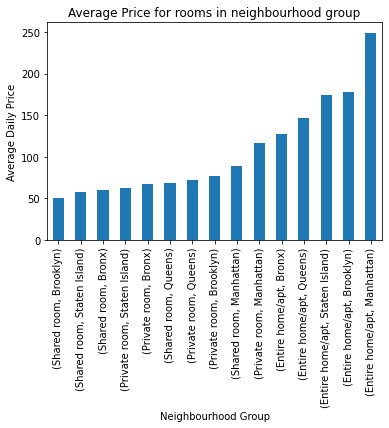

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Bronx                127.506596
                Queens               147.050573
                Staten Island        173.846591
                Brooklyn             178.346202
                Manhattan            249.257994
Private room    Staten Island         62.292553
                Bronx                 66.890937
                Queens                71.762456
                Brooklyn              76.545428
                Manhattan            116.776622
Shared room     Brooklyn              50.773723
                Staten Island         57.444444
                Bronx                 59.800000
                Queens                69.020202
                Manhattan             88.977083

In [13]:
df1 = df_price.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df1).sort_values(by='room_type')

In [43]:
promedio=df1.to_dict()
promedio

{('Shared room', 'Brooklyn'): 50.77372262773723,
 ('Shared room', 'Staten Island'): 57.44444444444444,
 ('Shared room', 'Bronx'): 59.8,
 ('Private room', 'Staten Island'): 62.29255319148936,
 ('Private room', 'Bronx'): 66.89093701996927,
 ('Shared room', 'Queens'): 69.02020202020202,
 ('Private room', 'Queens'): 71.76245551601423,
 ('Private room', 'Brooklyn'): 76.54542761208769,
 ('Shared room', 'Manhattan'): 88.97708333333334,
 ('Private room', 'Manhattan'): 116.7766224004009,
 ('Entire home/apt', 'Bronx'): 127.5065963060686,
 ('Entire home/apt', 'Queens'): 147.05057251908397,
 ('Entire home/apt', 'Staten Island'): 173.8465909090909,
 ('Entire home/apt', 'Brooklyn'): 178.34620213433772,
 ('Entire home/apt', 'Manhattan'): 249.25799363539932}

In [44]:
type(promedio[('Shared room', 'Brooklyn')])

float

In [ ]:
def replace_null_price(a, b, c ):
    if a == 0: 
        return promedio[(b, c)]
    else:
        return a
      
df['price_not_null'] = df['price'].apply(lambda x: replace_null_price(x['price'], x['room_type'], x['neighbourhood_group']))

In [35]:
df['price_not_null']=df['price'].replace(to_replace = 0, value = df['price'].mean())

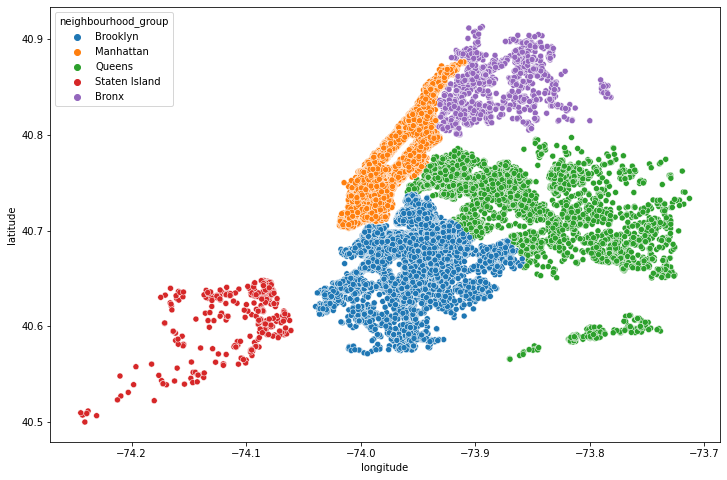

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.show()

In [ ]:
%pip install folium
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap


In [ ]:
Long=-73.80
Lat=40.80
locations = list(zip(df.latitude, df.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [ ]:
apt = df[df['room_type']=='Entire home/apt']
df_apt_group = apt.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
df_apt_group.head(10)

,host_id,host_name,neighbourhood,neighbourhood_group,apartment
20219,219517861,Sonder (NYC),Financial District,Manhattan,210
6452,7503643,Vida,Greenpoint,Brooklyn,52
8434,12243051,Sonder,Financial District,Manhattan,51
20222,219517861,Sonder (NYC),Murray Hill,Manhattan,50
17840,120762452,Stanley,Murray Hill,Manhattan,49
19908,205031545,Red Awning,Midtown,Manhattan,49
12278,30283594,Kara,Hell's Kitchen,Manhattan,41
17458,107434423,Blueground,Chelsea,Manhattan,37
17635,113805886,Yaacov,Upper East Side,Manhattan,33
12280,30283594,Kara,Midtown,Manhattan,33


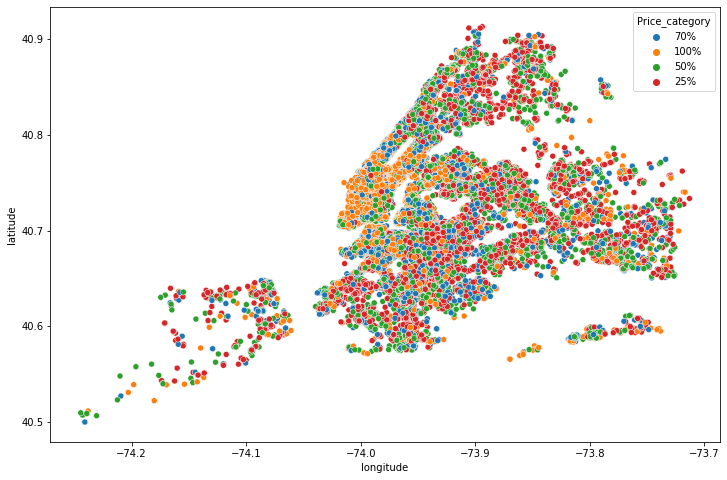

In [ ]:
def categoria_precio(precio): 
    if precio <= 69: 
        return '25%' 
    elif precio <= 106: 
        return '50%' 
    elif precio <= 175: 
        return '70%' 
    else: return '100%'
    
df['Price_category'] = df['price'].apply(categoria_precio)

plt.figure(figsize=(12,8)) 
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.Price_category) 
plt.show()


In [ ]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Price_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,70%
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,100%
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,,0.00,1,365,70%
